### Load the MI data

In [1]:
import numpy as np
a = np.load('mi_all.npy')
print(a.shape)


(23, 2, 127, 4)


### Print a part of the data

In [2]:
mi_xt_mean = np.mean(a,0)[0]
mi_ty_mean = np.mean(a,0)[1]
#mi_xt_mean = a[0,0,:,:]
#mi_ty_mean = a[0,1,:,:]
print(mi_xt_mean.shape)
print(mi_xt_mean)
print(mi_ty_mean)

(127, 4)
[[13.23116692 10.40200698  8.79228442  6.56862126]
 [13.22568313 10.44264017  8.55853815  6.29621011]
 [13.22111405 10.37634199  8.357373    6.2646648 ]
 [13.21752791  9.98441705  8.13785895  6.2841588 ]
 [13.21400388  9.88951314  8.00119881  6.27977671]
 [13.20988103  9.85165441  7.91110365  6.32219864]
 [13.20860984  9.67805306  7.84462562  6.32785242]
 [13.20515174  9.48082769  7.81222134  6.36547383]
 [13.20258742  9.40197526  7.76261749  6.36236615]
 [13.20098185  9.29126715  7.66649162  6.29231105]
 [13.19595342  9.17725295  7.62851111  6.27319006]
 [13.18873856  9.11068062  7.58261397  6.35364755]
 [13.18714789  9.11938293  7.51318534  6.30359673]
 [13.19169029  8.97973759  7.45749441  6.22273859]
 [13.18550772  9.09984019  7.4278698   6.2179511 ]
 [13.17946309  9.12102824  7.45846261  6.3015444 ]
 [13.18210181  9.12405475  7.41087963  6.28502533]
 [13.17691204  9.08699118  7.4439674   6.26082863]
 [13.16824627  9.07438082  7.37329621  6.22059969]
 [13.17233743  9.17160

### Sample from the MI data

In [3]:
IXM_N = mi_xt_mean[0,:]
IYM_N = mi_ty_mean[0,:]

T =1

for i in range(1,mi_xt_mean.shape[0]):
    
    A_ = i <= 4 and i % 1 == 0  
    A0 = i > 4 and i <= 10 and i % 2 == 0    
    A1 = i > 10 and i <= 30 and i % 3 == 0     
    A2 = i > 30 and i % 3 == 0    

    #if A0 or A1 or A2:
    if  A0 or A1 or A2:
        mean_vec_xt = np.mean(mi_xt_mean[T:i+1,:],axis=0)
        mean_vec_yt = np.mean(mi_ty_mean[T:i+1,:],axis=0)  
                             
        #print(T,i+1)                      
        IXM_N = np.append(IXM_N,mean_vec_xt)
        IYM_N = np.append(IYM_N,mean_vec_yt)
        
        T = i+1

        
IXM_N = np.reshape(IXM_N,(-1,4))
IYM_N = np.reshape(IYM_N,(-1,4))
print(IXM_N.shape)

(43, 4)


### Data shape

In [4]:
#mi_ty_mean[0:10,3]=np.array(mi_ty_mean[0:10,3])
IXM_N, IYM_N = mi_ty_mean, mi_ty_mean
print(IXM_N.shape)
print(IYM_N.shape)

(127, 4)
(127, 4)


### Apply roling mean

In [8]:
import pandas as pd
T=3
IXM_N, IYM_N = np.zeros((mi_xt_mean.shape[0]-T+1,4)), np.zeros((mi_ty_mean.shape[0]-T+1,4))

for i in range(4):
    IXM_N[:, i] = pd.Series(mi_xt_mean[:, i]).rolling(T).mean().iloc[T-1:].values
    IYM_N[:, i] = pd.Series(mi_ty_mean[:, i]).rolling(T).mean().iloc[T-1:].values
    
    
print(IXM_N.shape)
print(IYM_N.shape)

(125, 4)
(125, 4)


### Plot Information Plane

/tmp/ipykernel_9369/2046707164.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


<Figure size 800x800 with 0 Axes>

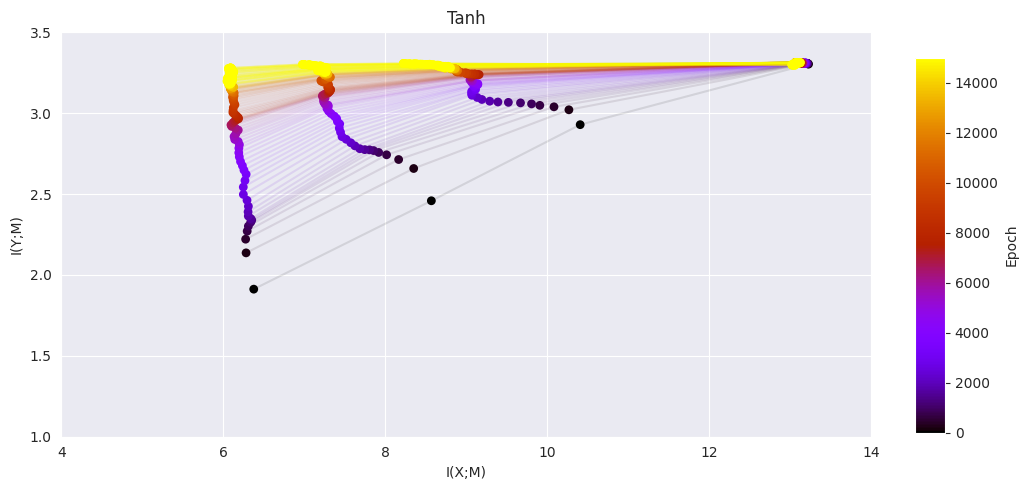

<Figure size 800x800 with 0 Axes>

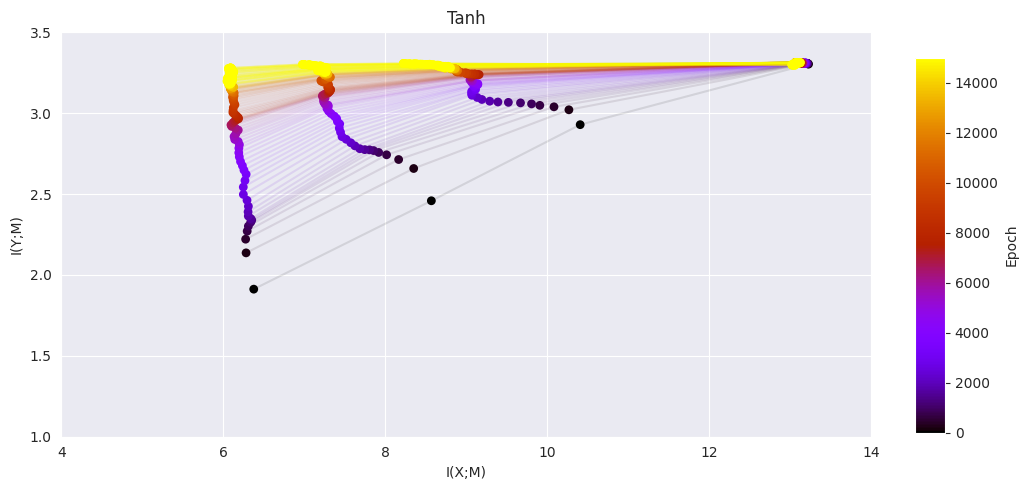

In [21]:
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 2)

COLORBAR_MAX_EPOCHS = 15000

plt.tight_layout()

fig = plt.figure(figsize=(10, 5))

sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=0, vmax=COLORBAR_MAX_EPOCHS))
sm._A = []

n_epoch = IXM_N.shape[0]

PLOT_LAYERS = [0]
for epoch in range(0, n_epoch):
    c = sm.to_rgba(220 * (epoch))
    xmvals = IXM_N[epoch]
    ymvals = IYM_N[epoch]
    
    plt.plot(xmvals, ymvals, c=c, alpha=0.1, zorder=1)
    plt.scatter(xmvals, ymvals, s=40, facecolors=[c for _ in PLOT_LAYERS], edgecolor='none', zorder=2)

plt.ylim([1, 3.5])
plt.xlim([4, 14])
plt.xlabel('I(X;M)')
plt.ylabel('I(Y;M)')
plt.title('Tanh')

# colorbar
cbaxes = fig.add_axes([0.92, 0.125, 0.03, 0.75])
plt.colorbar(sm, label='Epoch', cax=cbaxes)

plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show(block=True)
